## Section 7. Logistic Regression


## Objective
1. **분류 문제를 푸는 기본적인 머신러닝인 Logistic Regression에 대해 알아봅니다. **
2. **실제로 구현하여 그 결과를 확인합니다.**

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

## 문제 1. Iris Dataset 을 이용해 Iris 종 구별(classification)하기

* Iris 데이터는 4개의 features 을 가지고 있습니다.
    1. sepal length in cm 
    2. sepal width in cm 
    3. petal length in cm 
    4. petal width in cm 

* Iris 데이터는 labels 은 3가지 class로 나뉘어 집니다. 
    * Iris Setosa 
    * Iris Versicolour 
    * Iris Virginica
![Imgur](https://i.imgur.com/EO2cI4i.png)

### Requirements


1. [Iris data](https://archive.ics.uci.edu/ml/datasets/iris) 을 이용해 
**Numpy** 을 이용해 **Iris setosa Vs Iris Versicolour** 을 구별하는 **logistic regression** 모델을 생성 합니다.
2. cost 와 Accuracy 을 측정 합니다. 
3. cost 와 Accuracy 을 시각화 합니다. 


In [0]:
# 아래 코드를 실행해 주세요
np.random.seed(1)
iris = load_iris()

xs = iris['data']
ys = iris['target']
ys_name = iris['target_names']
ys_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### 답안지 입력란
* 아래에 답을 서술하여 주세요


In [0]:
def sigmoid(xs):
    return 1/(1+np.exp(-xs))

In [0]:
def cee(pred, true): 
    return -np.mean(true*np.log(pred) + (1-true)*(np.log(1-pred)))

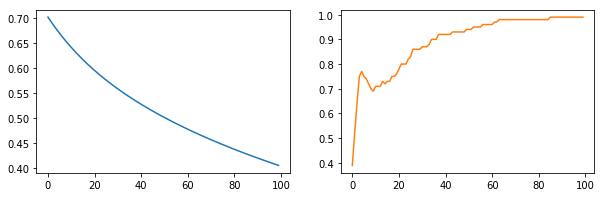

In [7]:
# answer1 - separate bias
np.random.seed(1)
iris = load_iris()

xs = iris['data']
ys = iris['target']
ys_name = iris['target_names']
ys_name

indices = np.where((ys==0) | (ys==1))[0]

xs_data = xs[indices]
xs_data = (xs_data - xs_data.min(axis=0)) / (xs_data.max(axis=0) - xs_data.min(axis=0))
ys_data = ys[indices].reshape([-1, 1])

weights = np.random.normal(size=(4,1), loc=0.0, scale=0.1)
bias = np.array([0])

lr = 0.001
losses = []
accs = []
for i in range(100):
    logits = np.matmul(xs_data, weights) + bias
    pred = sigmoid(logits)

    error = pred - ys_data

    dw = np.matmul(error.T, xs_data).T
    db = np.mean(error)

    weights = weights - lr * dw
    bias = bias - lr * db

    loss = cee(pred, ys_data)
    acc = np.mean(np.equal(pred > 0.5, ys_data))

    losses.append(loss)
    accs.append(acc)

fig, axes = plt.subplots(1,2)
fig.set_size_inches(10,3)
axes[0].plot(range(100), losses, label='cost', color='C0')
axes[1].plot(range(100), accs, label='acc', color='C1')
plt.show()

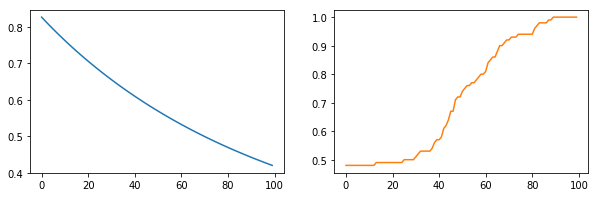

In [8]:
# answer2 - concat bias
np.random.seed(1)
iris = load_iris()

xs = iris['data']
ys = iris['target']
ys_name = iris['target_names']
ys_name

indices = np.where((ys==0) | (ys==1))[0]

xs_data = xs[indices]
xs_data = (xs_data - xs_data.min(axis=0)) / (xs_data.max(axis=0) - xs_data.min(axis=0))
ys_data = ys[indices].reshape([-1, 1])

xs_concat = np.concatenate([xs_data, np.ones(shape=[100, 1])], axis=1)
weights = np.random.normal(size=[xs_concat.shape[-1], 1])

lr = 0.001
losses = []
accs = []
for i in range(100):
    logits = np.matmul(xs_concat, weights)
    pred = sigmoid(logits)

    error = pred - ys_data

    gradients = np.matmul(error.T, xs_concat).T

    weights = weights - lr * gradients

    loss = cee(pred, ys_data)
    acc = np.mean(np.equal(pred > 0.5, ys_data))

    losses.append(loss)
    accs.append(acc)

fig, axes = plt.subplots(1,2)
fig.set_size_inches(10,3)
axes[0].plot(range(100), losses, label='cost', color='C0')
axes[1].plot(range(100), accs, label='acc', color='C1')
plt.show()

#### 정답 확인
* Cost는 0.5 아래로 떨어져야 합니다.
* Accuracy는 100%가 나올 수 있습니다. 

아래와 같은 그림이 나오면 성공 입니다.


![Imgur](https://i.imgur.com/jVvhXnY.png)